# Analysis of Data
This notebook explores the dataframe we created with the counts for the sperm cells as well as the bounding boxes. We have a script to put on the bounding boxes so now we will check distributions and quality of the data

### Step 1: Loading the Dataset


The dataset is first loaded into a Pandas DataFrame. This step ensures that all the necessary data is available for further processing. Once loaded, we preview the first few rows to understand its structure.

#### Key Operations:
- Read the dataset using `pandas.read_csv()`
- Display the first few rows to understand the data format
- Check for missing values using `df.isnull().sum()`
- Identify column types using `df.info()`
- Get the total number of samples using `df.shape` 


1. **Preview of the dataset**: This gives us an idea of how the data is structured, showing columns like `frame_name`, `sperm_count`, `bb0`, `bb1`, etc.
2. **Missing values check**: If missing values are found, we need to decide whether to remove or impute them.
3. **Data types check**: Ensures that numerical and categorical data types are correctly assigned, avoiding issues in later analysis.
4. **Number of Samples**: 19841

In [28]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [19]:
#Reading in our counts_bb file
#df = pd.read_csv("C:/Users/Derrick Mayall/GitHub_Repos/6165/Data/Train_test/Counts_BB.csv")
df = pd.read_csv(r"D:\UNCC Grad\Spring 2025\DSBA 6165\Project\DSBA_6165\Data\Train_test\Counts_BB.csv")
df

,Unnamed: 0,frame_name,sperm_count,cluster_count,small_or_pinhead_count,folder,fid,class,bb0,bb1,bb2,bb3
0,0,14_frame_0,3,0,0,14,ckyw6zzlj001r3867thf0fuy7,0,0.208594,0.825000,0.035937,0.037500
1,1,14_frame_0,3,0,0,14,ckyw704kw001v3867kvyjtx6k,0,0.796094,0.797917,0.029687,0.037500
2,2,14_frame_0,3,0,0,14,ckyw708pn001z386779fr849h,0,0.827344,0.123958,0.035937,0.039583
3,3,14_frame_1,3,0,0,14,ckyw6zzlj001r3867thf0fuy7,0,0.208594,0.814583,0.035937,0.037500
4,4,14_frame_1,3,0,0,14,ckyw704kw001v3867kvyjtx6k,0,0.764062,0.781250,0.029687,0.037500
...,...,...,...,...,...,...,...,...,...,...,...,...
19836,19836,52_frame_427,6,0,2,52,cl1x89ze6000o3f6baic4zklo,0,0.464062,0.462500,0.037500,0.054167
19837,19837,52_frame_427,6,0,2,52,cl1x8a7j3000s3f6bvn1rm1tw,0,0.416406,0.400000,0.029687,0.045833
19838,19838,52_frame_427,6,0,2,52,cl1x8ih7n00103f6b67egfbw2,0,0.057031,0.803125,0.032813,0.043750
19839,19839,52_frame_427,6,0,2,52,cl52g254u000o3b6gcyhoi1fk,2,0.132031,0.112500,0.026562,0.037500


In [20]:
#keeping only necessary columns
df = df[['frame_name', ' sperm_count', 'fid', 'bb0', 'bb1', 'bb2', 'bb3']]
df

,frame_name,sperm_count,fid,bb0,bb1,bb2,bb3
0,14_frame_0,3,ckyw6zzlj001r3867thf0fuy7,0.208594,0.825000,0.035937,0.037500
1,14_frame_0,3,ckyw704kw001v3867kvyjtx6k,0.796094,0.797917,0.029687,0.037500
2,14_frame_0,3,ckyw708pn001z386779fr849h,0.827344,0.123958,0.035937,0.039583
3,14_frame_1,3,ckyw6zzlj001r3867thf0fuy7,0.208594,0.814583,0.035937,0.037500
4,14_frame_1,3,ckyw704kw001v3867kvyjtx6k,0.764062,0.781250,0.029687,0.037500
...,...,...,...,...,...,...,...
19836,52_frame_427,6,cl1x89ze6000o3f6baic4zklo,0.464062,0.462500,0.037500,0.054167
19837,52_frame_427,6,cl1x8a7j3000s3f6bvn1rm1tw,0.416406,0.400000,0.029687,0.045833
19838,52_frame_427,6,cl1x8ih7n00103f6b67egfbw2,0.057031,0.803125,0.032813,0.043750
19839,52_frame_427,6,cl52g254u000o3b6gcyhoi1fk,0.132031,0.112500,0.026562,0.037500


In [68]:
# Display the number of missing values per column
print(df.isnull().sum())

frame_name      0
 sperm_count    0
fid             0
bb0             0
bb1             0
bb2             0
bb3             0
dtype: int64


In [67]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19841 entries, 0 to 19840
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   frame_name    19841 non-null  object 
 1    sperm_count  19841 non-null  int64  
 2   fid           19841 non-null  object 
 3   bb0           19841 non-null  float64
 4   bb1           19841 non-null  float64
 5   bb2           19841 non-null  float64
 6   bb3           19841 non-null  float64
dtypes: float64(4), int64(1), object(2)
memory usage: 1.1+ MB


In [69]:
df.shape

(19841, 7)

### Step 2: Analyzing Image Properties and Distribution

#### Explanation
This step examines the dimensions of the images in the dataset. It helps us understand whether the images have a consistent size or if preprocessing (such as resizing) is necessary.

#### Key Operations:
- Extract image width and height
- Plot histograms of image dimensions to check for variability
- Compute the aspect ratio of images to ensure uniformity


1. **Histograms of image widths and heights**: If there is a large variation in sizes, resizing might be needed before feeding images into a model.
2. **Aspect ratio analysis**: If aspect ratios differ significantly, it might cause distortion when resizing images for a CNN model.

**All images in the dataset have the same width, height, and aspect ratio.**

In [21]:
import os
import cv2

In [22]:
# Define the base folder where images are stored
image_folder = r"D:\UNCC Grad\Spring 2025\DSBA 6165\Project\DSBA_6165\Data\Train_test"

In [ ]:
# Function to get image properties
def get_image_properties(image_path):
    img = cv2.imread(image_path)
    if img is None:
        return None, None  
    height, width = img.shape[:2]
    aspect_ratio = width / height
    return (width, height), aspect_ratio

In [ ]:
# Lists to store image properties
image_sizes = []
aspect_ratios = []
missing_images = []

# Iterate through the dataset and collect image properties
for frame in df["frame_name"].unique():
    image_path = os.path.join(image_folder, frame + ".jpg")  
    
    if not os.path.exists(image_path):
        missing_images.append(frame)  
        continue
    
    size, aspect_ratio = get_image_properties(image_path)
    if size:
        image_sizes.append(size)
        aspect_ratios.append(aspect_ratio)

In [25]:
# Convert to DataFrame for analysis
image_df = pd.DataFrame(image_sizes, columns=["Width", "Height"])
image_df["Aspect Ratio"] = aspect_ratios

C:\Users\emanr\AppData\Local\Temp\ipykernel_34420\3194311121.py:3: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot([image_df["Width"], image_df["Height"]], labels=["Width", "Height"])


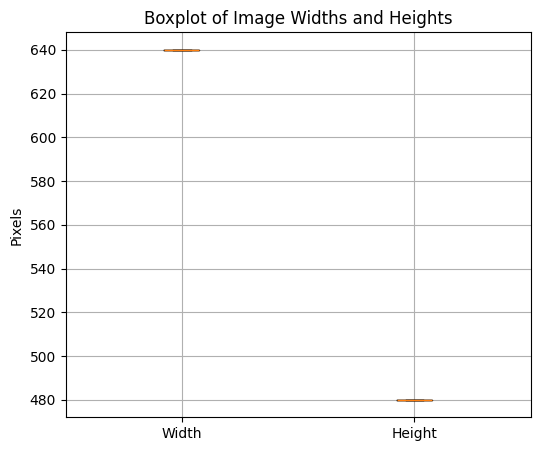

In [31]:
# Create a boxplot for Width and Height
plt.figure(figsize=(6, 5))
plt.boxplot([image_df["Width"], image_df["Height"]], labels=["Width", "Height"])

# Labels and title
plt.ylabel("Pixels")
plt.title("Boxplot of Image Widths and Heights")
plt.grid(True)

# Show the plot
plt.show()

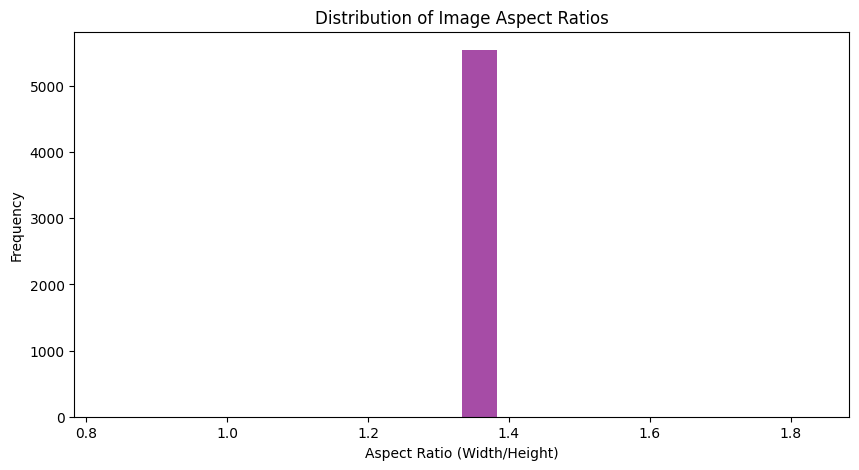

In [30]:
# Plot aspect ratio distribution
plt.figure(figsize=(10, 5))
plt.hist(image_df["Aspect Ratio"], bins=20, color="purple", alpha=0.7)
plt.xlabel("Aspect Ratio (Width/Height)")
plt.ylabel("Frequency")
plt.title("Distribution of Image Aspect Ratios")
plt.show()

In [32]:
# Print summary statistics
print(image_df.describe())

        Width  Height  Aspect Ratio
count  5546.0  5546.0  5.546000e+03
mean    640.0   480.0  1.333333e+00
std       0.0     0.0  2.220646e-16
min     640.0   480.0  1.333333e+00
25%     640.0   480.0  1.333333e+00
50%     640.0   480.0  1.333333e+00
75%     640.0   480.0  1.333333e+00
max     640.0   480.0  1.333333e+00


### Step 3: Visualizing Sample Images

#### Explanation
To ensure that the dataset contains high-quality images, a few random images are displayed. This provides insight into how sperm cells appear in the dataset.

#### Key Operations:
- Select a few random images
- Display them using `matplotlib`
- Verify that images are properly loaded and correctly formatted


1. **Image clarity check**: Ensures that images are not too dark, overexposed, or unclear.
2. **Proper format verification**: Confirms that images are being read correctly.

In [ ]:
import random


In [ ]:
# Function to display random grayscale images
def display_random_images(df, image_folder, num_samples=3):
    sample_frames = df["frame_name"].unique()  
    
    # Randomly select images
    selected_frames = random.sample(list(sample_frames), min(num_samples, len(sample_frames)))

    fig, axes = plt.subplots(1, len(selected_frames), figsize=(15, 5))

    if len(selected_frames) == 1:
        axes = [axes]  

    for ax, frame_name in zip(axes, selected_frames):
        image_path = os.path.join(image_folder, frame_name + ".jpg")

        # Load the image
        img = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
        if img is None:
            print(f"Warning: Image {image_path} not found!")
            continue

        ax.imshow(img, cmap="gray")  
        ax.set_title(frame_name)
        ax.axis("off")  

    plt.show()

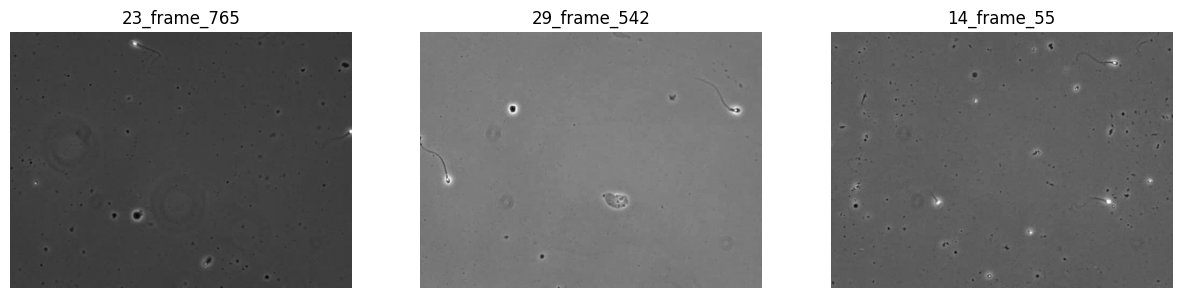

In [47]:
# Call the function to display random images
display_random_images(df, image_folder, num_samples=3)

### Step 4: Detecting Blurry Images

#### Explanation
Blurry images can negatively impact model training. To measure blur, the Laplacian variance method is used.

#### Key Operations:
- Compute variance of the Laplacian for each image
- Set a threshold for defining images as blurry
- Plot a histogram of blur scores


1. **Histogram of blur scores**: If many images have very low variance, the dataset might have a blur problem.
2. **List of blurry images**: Helps decide if blurry images should be removed or enhanced.

In [ ]:
# Function to compute the variance of the Laplacian (blur detection)
def detect_blur(image_path):
    img = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)  
    if img is None:
        return None  
    return cv2.Laplacian(img, cv2.CV_64F).var()  

In [49]:
# Analyze all images in the dataset
blur_scores = {}
missing_images = []

for frame_name in df["frame_name"].unique():
    image_path = os.path.join(image_folder, frame_name + ".jpg")
    
    if not os.path.exists(image_path):
        missing_images.append(frame_name)
        continue
    
    blur_scores[frame_name] = detect_blur(image_path)

In [ ]:
# Convert results to a DataFrame
blur_df = pd.DataFrame(blur_scores.items(), columns=["frame_name", "blur_score"])

# Set a threshold for blur detection 
blur_threshold = blur_df["blur_score"].median() * 0.5  

# Classify images
blur_df["blurry"] = blur_df["blur_score"] < blur_threshold

In [51]:
# Show statistics
print("Blur Detection Summary:")
print(blur_df["blurry"].value_counts())

Blur Detection Summary:
blurry
False    4452
True     1094
Name: count, dtype: int64


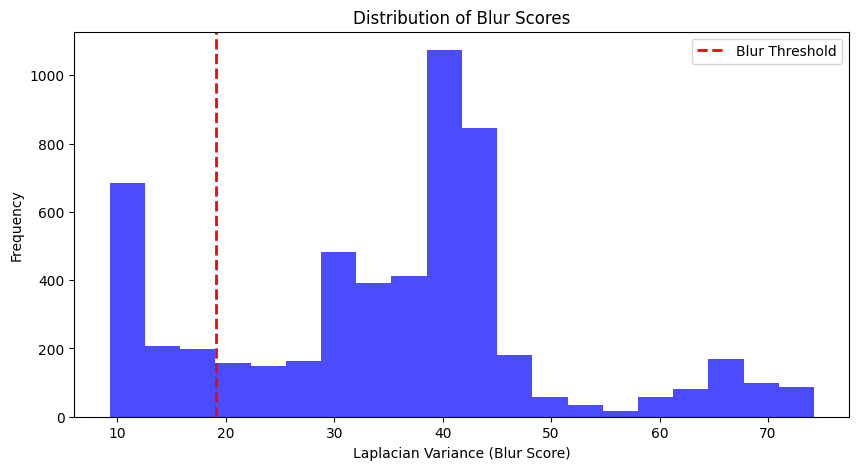

In [52]:
# Plot distribution of blur scores
plt.figure(figsize=(10, 5))
plt.hist(blur_df["blur_score"], bins=20, color="blue", alpha=0.7)
plt.axvline(blur_threshold, color="red", linestyle="dashed", linewidth=2, label="Blur Threshold")
plt.xlabel("Laplacian Variance (Blur Score)")
plt.ylabel("Frequency")
plt.title("Distribution of Blur Scores")
plt.legend()
plt.show()

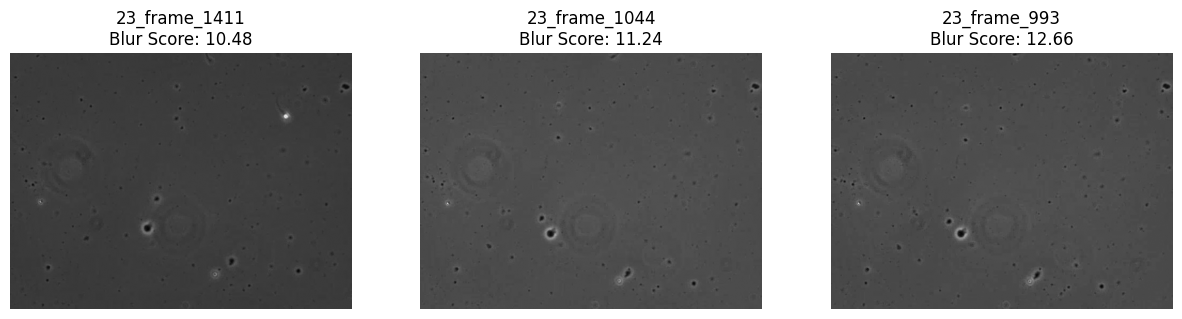

In [53]:
# Display a few blurry images
blurry_samples = blur_df[blur_df["blurry"]].sample(min(3, sum(blur_df["blurry"])), random_state=42)

fig, axes = plt.subplots(1, len(blurry_samples), figsize=(15, 5))

for ax, frame_name in zip(axes, blurry_samples["frame_name"]):
    image_path = os.path.join(image_folder, frame_name + ".jpg")
    img = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
    ax.imshow(img, cmap="gray")
    ax.set_title(f"{frame_name}\nBlur Score: {blur_scores[frame_name]:.2f}")
    ax.axis("off")

plt.show()

### Step 5: Measuring Noise in Images

#### Explanation
Noise can interfere with model accuracy. We use the **Mean Absolute Deviation (MAD)** of pixel intensities to detect noise.

#### Key Operations:
- Compute MAD for each image
- Compare noise scores to a threshold
- Display noisy images for manual inspection


1. **Histogram of noise scores**: Higher scores indicate more noisy images.
2. **Visual samples of noisy images**: Helps in deciding whether to apply noise reduction techniques.

**No noisy images were found in the dataset above the threshold**

In [ ]:
# Function to calculate noise level using Mean Absolute Deviation (MAD)
def detect_noise(image_path):
    img = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)  
    if img is None:
        return None  
    
    # Compute the mean pixel intensity
    mean_intensity = np.mean(img)
    
    # Compute Mean Absolute Deviation (MAD)
    mad = np.mean(np.abs(img - mean_intensity))
    
    return mad 

In [55]:
# Analyze all images in the dataset
noise_scores = {}
missing_images = []

for frame_name in df["frame_name"].unique():
    image_path = os.path.join(image_folder, frame_name + ".jpg")
    
    if not os.path.exists(image_path):
        missing_images.append(frame_name)
        continue
    
    noise_scores[frame_name] = detect_noise(image_path)

In [ ]:
# Convert results to a DataFrame
noise_df = pd.DataFrame(noise_scores.items(), columns=["frame_name", "noise_score"])

# Set a threshold for noise detection 
noise_threshold = noise_df["noise_score"].median() * 1.5  

# Classify images
noise_df["noisy"] = noise_df["noise_score"] > noise_threshold

# Show statistics
print("Noise Detection Summary:")
print(noise_df["noisy"].value_counts())

Noise Detection Summary:
noisy
False    5546
Name: count, dtype: int64


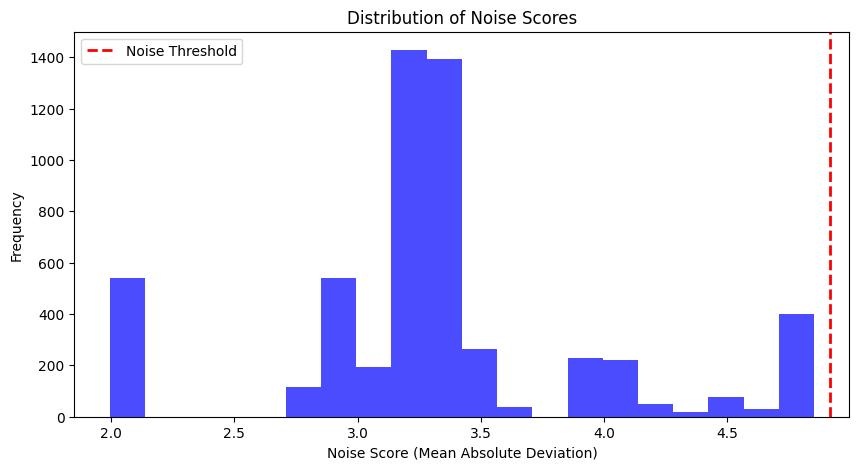

In [57]:
# Plot distribution of noise scores
plt.figure(figsize=(10, 5))
plt.hist(noise_df["noise_score"], bins=20, color="blue", alpha=0.7)
plt.axvline(noise_threshold, color="red", linestyle="dashed", linewidth=2, label="Noise Threshold")
plt.xlabel("Noise Score (Mean Absolute Deviation)")
plt.ylabel("Frequency")
plt.title("Distribution of Noise Scores")
plt.legend()
plt.show()

### Step 6: Analyzing Sperm Count Distribution

#### Explanation
This step helps to understand how sperm counts are distributed across images. A significant imbalance may require data augmentation.

#### Key Operations:
- Compute descriptive statistics (mean, median, min, max)
- Plot a histogram to visualize sperm count distribution


1. **Histogram of sperm counts**: If highly imbalanced, consider balancing the dataset.
2. **Summary statistics**: Helps define appropriate preprocessing steps for handling outliers.

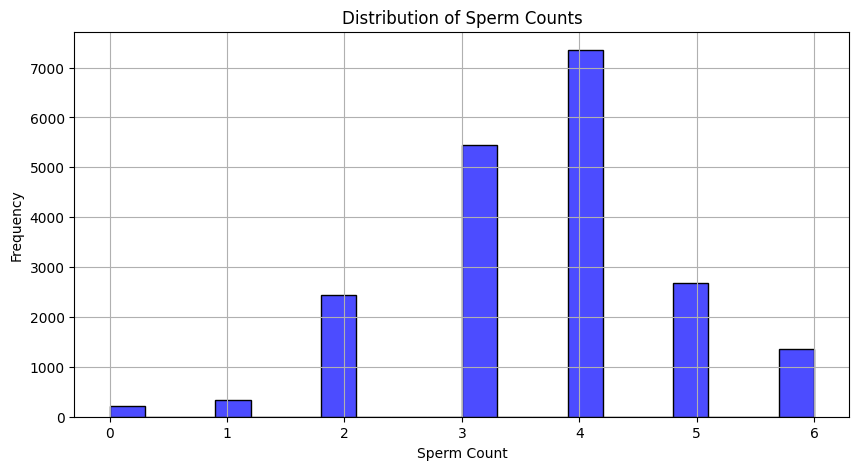

In [70]:
# Plot the distribution of sperm counts
plt.figure(figsize=(10, 5))
sns.histplot(df[" sperm_count"], bins=20, color="blue", alpha=0.7)
plt.xlabel("Sperm Count")
plt.ylabel("Frequency")
plt.title("Distribution of Sperm Counts")
plt.grid(True)
plt.show()

In [62]:
# Summary statistics for sperm count
sperm_count_stats = df[" sperm_count"].describe()

# Display summary statistics
print(sperm_count_stats)

count    19841.000000
mean         3.654604
std          1.177494
min          0.000000
25%          3.000000
50%          4.000000
75%          4.000000
max          6.000000
Name:  sperm_count, dtype: float64


### Step 7: Applying Data Augmentation

#### Explanation
Data augmentation increases dataset diversity to improve model generalization.

#### Key Operations:
- Apply flipping, rotation, brightness adjustments
- Display original and augmented images


1. **Visual comparison of augmented images**: Ensures augmentation produces meaningful variations.

In [ ]:
# Function to apply data augmentation
def augment_image(image):
    transformations = []
    
    # Flip horizontally
    transformations.append(cv2.flip(image, 1)) 
    
    # Flip vertically
    transformations.append(cv2.flip(image, 0)) 

    # Rotate by a random angle
    angle = random.choice([90, 180, 270])
    (h, w) = image.shape[:2]
    M = cv2.getRotationMatrix2D((w//2, h//2), angle, 1.0)
    rotated = cv2.warpAffine(image, M, (w, h))
    transformations.append(rotated)

    # Adjust brightness randomly
    alpha = random.uniform(0.7, 1.3)  
    brightened = np.clip(image * alpha, 0, 255).astype(np.uint8)
    transformations.append(brightened)
    
    return transformations

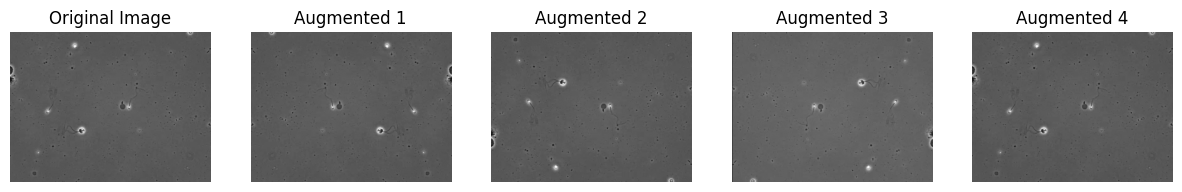

In [64]:
# Select a random image for augmentation
sample_frame = random.choice(df["frame_name"].unique())
image_path = os.path.join(image_folder, sample_frame + ".jpg")

# Load the image
image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

if image is not None:
    augmented_images = augment_image(image)
    
    # Display original and augmented images
    fig, axes = plt.subplots(1, len(augmented_images) + 1, figsize=(15, 5))

    axes[0].imshow(image, cmap="gray")
    axes[0].set_title("Original Image")
    axes[0].axis("off")

    for i, aug_img in enumerate(augmented_images):
        axes[i + 1].imshow(aug_img, cmap="gray")
        axes[i + 1].set_title(f"Augmented {i+1}")
        axes[i + 1].axis("off")

    plt.show()
else:
    print(f"Image not found: {image_path}")